# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [128]:
# Import your libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [129]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [130]:
display (websites)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [131]:
# 1781 rows x 21 columns
# Data types : strings / Numeric (int or float) / Dates
# The columns URL_LENGTH through DNS_QUERY_TIMES are the features of the websites
# The "Type" column, the value 0 represents benign websites, and the value 1 represents malicious websites.
# not sure about it

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

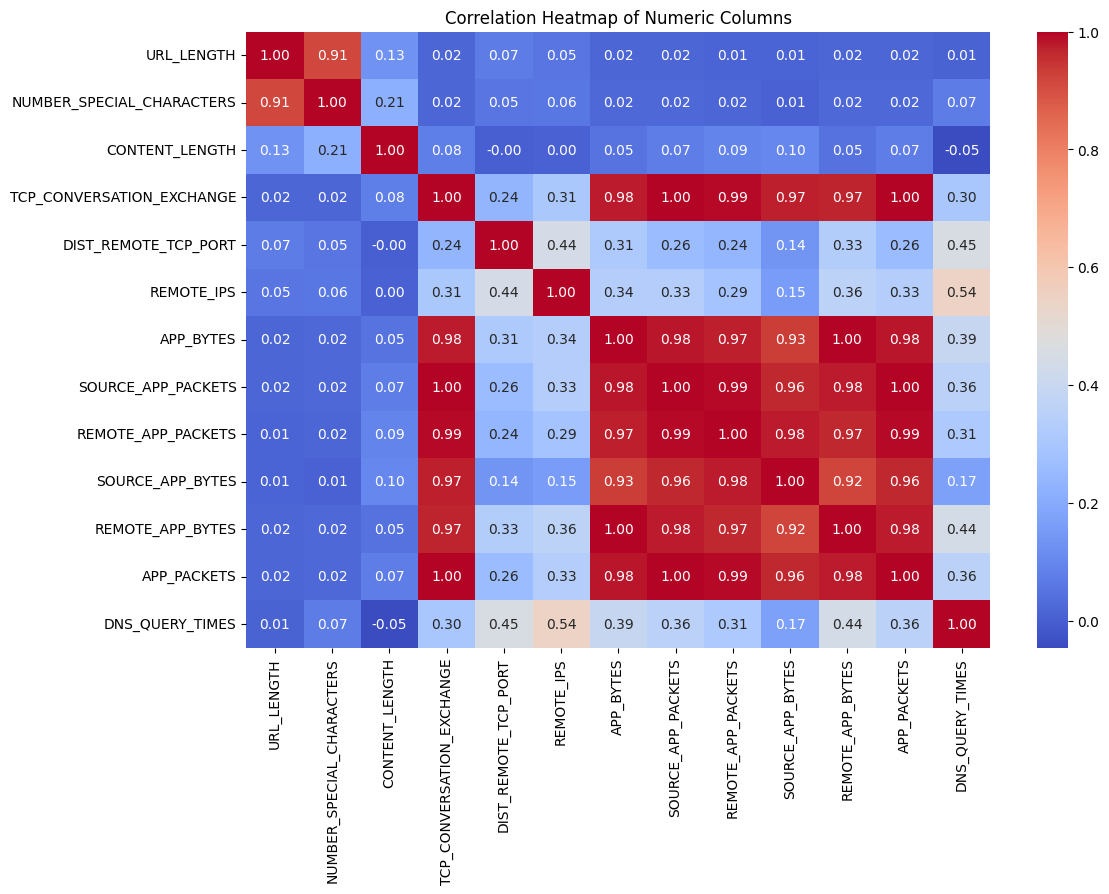

In [132]:

# Complete list of numeric columns
numeric_columns = [
    "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "CONTENT_LENGTH",
    "TCP_CONVERSATION_EXCHANGE", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS",
    "APP_BYTES", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS",
    "SOURCE_APP_BYTES", "REMOTE_APP_BYTES", "APP_PACKETS",
    "DNS_QUERY_TIMES"
]

# Drop rows with NaN, NA, or None values
websites = websites.dropna(subset=numeric_columns)

# Extract numeric values
numeric_values = websites[numeric_columns].values

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(numeric_values, rowvar=False)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=numeric_columns, yticklabels=numeric_columns)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [133]:
# DNS_querry_times / content_ length had to drop values for having this heat map.

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

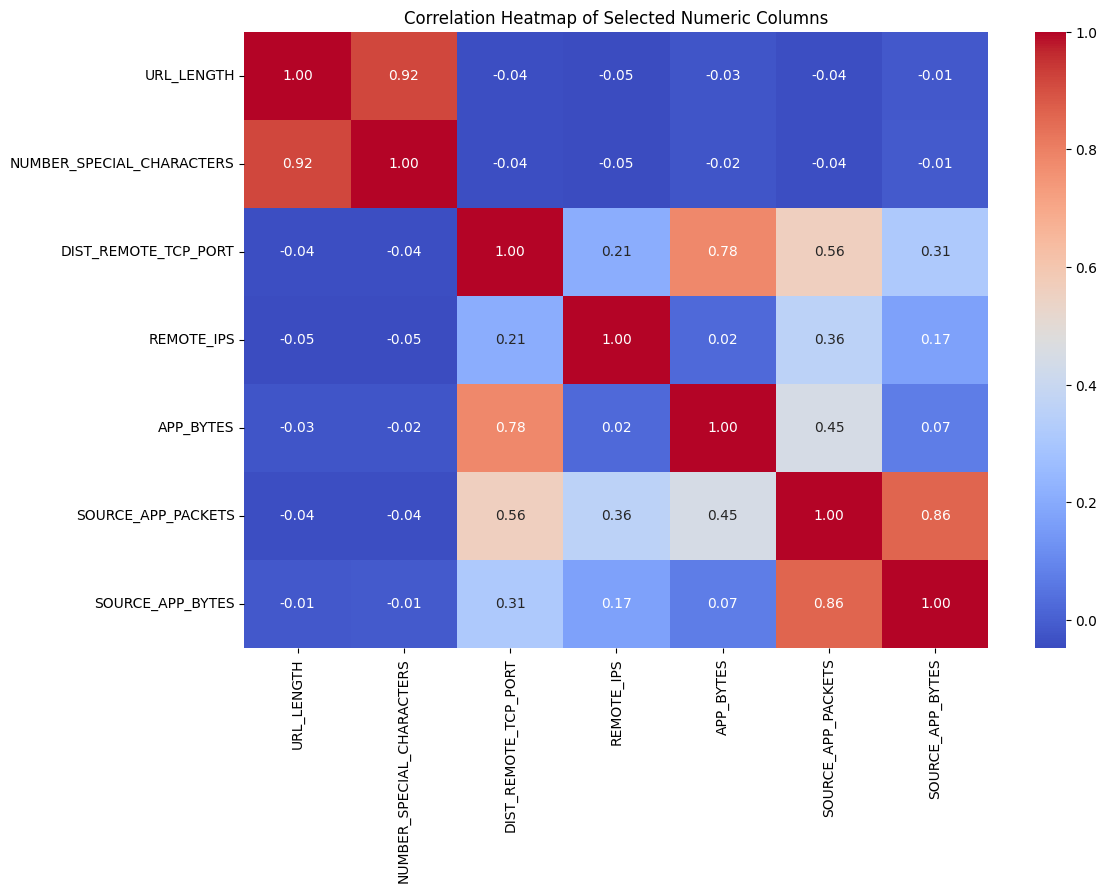

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
websites = pd.read_csv('website.csv')

# Complete list of numeric columns
numeric_columns = [
    "URL_LENGTH", "NUMBER_SPECIAL_CHARACTERS", "CONTENT_LENGTH",
    "TCP_CONVERSATION_EXCHANGE", "DIST_REMOTE_TCP_PORT", "REMOTE_IPS",
    "APP_BYTES", "SOURCE_APP_PACKETS", "REMOTE_APP_PACKETS",
    "SOURCE_APP_BYTES", "REMOTE_APP_BYTES", "APP_PACKETS",
    "DNS_QUERY_TIMES"
]

# Drop columns with high collinearity
high_collinear_columns = ["REMOTE_APP_BYTES", "REMOTE_APP_PACKETS", "TCP_CONVERSATION_EXCHANGE", "APP_PACKETS", "CONTENT_LENGTH", "DNS_QUERY_TIMES"]
selected_columns = [col for col in numeric_columns if col not in high_collinear_columns]

# Extract numeric values
numeric_values = websites[selected_columns].values

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(numeric_values, rowvar=False)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=selected_columns, yticklabels=selected_columns)
plt.title("Correlation Heatmap of Selected Numeric Columns")
plt.show()


In [135]:
# done / Removing one of the correlated features can lead to better model performance and generalization / make the model more interpretable / can lead to faster computations /


# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [136]:
# Read the CSV file
websites = pd.read_csv('website.csv')

# Count the number of missing values in each column
missing_values_count = websites.isnull().sum()

# Display the missing values count
print(missing_values_count)

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [137]:

# Fill categorical columns with mode
websites['CHARSET'].fillna(websites['CHARSET'].mode()[0], inplace=True)
websites['SERVER'].fillna(websites['SERVER'].mode()[0], inplace=True)
websites['WHOIS_COUNTRY'].fillna(websites['WHOIS_COUNTRY'].mode()[0], inplace=True)
websites['WHOIS_STATEPRO'].fillna(websites['WHOIS_STATEPRO'].mode()[0], inplace=True)

# Convert date columns to datetime type
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], errors='coerce')
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], errors='coerce')

# Impute DNS_QUERY_TIMES column with median
websites['DNS_QUERY_TIMES'].fillna(websites['DNS_QUERY_TIMES'].median(), inplace=True)

# Drop CONTENT_LENGTH column due to high missing values
websites.drop(columns=['CONTENT_LENGTH'], inplace=True)

# Print the updated DataFrame
display(websites)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,US,CA,2015-10-10 18:21:00,NaT,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,US,CA,NaT,NaT,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,US,CA,NaT,NaT,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Apache,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,NaT,2016-02-09 00:00:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,NaT,2016-02-09 00:00:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,NaT,NaT,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1998-01-04 00:00:00,2016-09-12 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0


In [138]:
#comments are in the code

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [139]:
# Count the number of missing values in each column
missing_values_count = websites.isnull().sum()

# Display the missing values count
print(missing_values_count)



URL                             0
URL_LENGTH                      0
NUMBER_SPECIAL_CHARACTERS       0
CHARSET                         0
SERVER                          0
WHOIS_COUNTRY                   0
WHOIS_STATEPRO                  0
WHOIS_REGDATE                1205
WHOIS_UPDATED_DATE           1122
TCP_CONVERSATION_EXCHANGE       0
DIST_REMOTE_TCP_PORT            0
REMOTE_IPS                      0
APP_BYTES                       0
SOURCE_APP_PACKETS              0
REMOTE_APP_PACKETS              0
SOURCE_APP_BYTES                0
REMOTE_APP_BYTES                0
APP_PACKETS                     0
DNS_QUERY_TIMES                 0
Type                            0
dtype: int64


In [140]:

# Read the CSV file
websites = pd.read_csv('website.csv')

# Fill categorical columns with mode
websites['CHARSET'].fillna(websites['CHARSET'].mode()[0], inplace=True)
websites['SERVER'].fillna(websites['SERVER'].mode()[0], inplace=True)
websites['WHOIS_COUNTRY'].fillna(websites['WHOIS_COUNTRY'].mode()[0], inplace=True)
websites['WHOIS_STATEPRO'].fillna(websites['WHOIS_STATEPRO'].mode()[0], inplace=True)

# Convert date columns to datetime type
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'], errors='coerce')
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'], errors='coerce')

# Fill missing date values with a placeholder
websites['WHOIS_REGDATE'].fillna('1900-01-01', inplace=True)
websites['WHOIS_UPDATED_DATE'].fillna('1900-01-01', inplace=True)

# Convert the placeholder back to datetime
websites['WHOIS_REGDATE'] = pd.to_datetime(websites['WHOIS_REGDATE'])
websites['WHOIS_UPDATED_DATE'] = pd.to_datetime(websites['WHOIS_UPDATED_DATE'])

# Impute DNS_QUERY_TIMES column with median
websites['DNS_QUERY_TIMES'].fillna(websites['DNS_QUERY_TIMES'].median(), inplace=True)

# Drop CONTENT_LENGTH column due to high missing values
websites.drop(columns=['CONTENT_LENGTH'], inplace=True)

# Print the updated DataFrame
display(websites)


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,US,CA,2015-10-10 18:21:00,1900-01-01 00:00:00,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,US,CA,1900-01-01 00:00:00,1900-01-01 00:00:00,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,US,CA,1900-01-01 00:00:00,1900-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,1997-07-10 04:00:00,2013-12-09 00:45:00,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Apache,US,TX,1996-12-05 00:00:00,2017-11-04 00:00:00,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,1900-01-01 00:00:00,2016-02-09 00:00:00,0,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,1900-01-01 00:00:00,2016-02-09 00:00:00,0,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,1900-01-01 00:00:00,1900-01-01 00:00:00,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1998-01-04 00:00:00,2016-09-12 00:00:00,0,0,0,0,0,0,0,0,0,0.0,0


In [141]:
# Count the number of missing values in each column
missing_values_count = websites.isnull().sum()

# Display the missing values count
print(missing_values_count)

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [142]:
# List unique values of WHOIS_COUNTRY before consolidation
unique_countries_before = websites['WHOIS_COUNTRY'].unique()
print("Unique values of WHOIS_COUNTRY before consolidation:")
print(unique_countries_before)

# Create a mapping of country name variations to consistent codes
country_mapping = {
    'Cyprus': 'CY',
    'us': 'US',
    'se': 'SE',
    'United Kingdom': 'GB',
    "[u'GB'; u'UK']": 'GB'
}

# Replace inconsistent country names with consistent codes
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(country_mapping)

# List unique values of WHOIS_COUNTRY after consolidation
unique_countries_after = websites['WHOIS_COUNTRY'].unique()
display("\nUnique values of WHOIS_COUNTRY after consolidation:")
display(unique_countries_after)


Unique values of WHOIS_COUNTRY before consolidation:
['US' 'SC' 'GB' 'UK' 'RU' 'AU' 'CA' 'PA' 'se' 'IN' 'LU' 'TH'
 "[u'GB'; u'UK']" 'FR' 'NL' 'UG' 'JP' 'CN' 'SE' 'SI' 'IL' 'ru' 'KY' 'AT'
 'CZ' 'PH' 'BE' 'NO' 'TR' 'LV' 'DE' 'ES' 'BR' 'us' 'KR' 'HK' 'UA' 'CH'
 'United Kingdom' 'BS' 'PK' 'IT' 'Cyprus' 'BY' 'AE' 'IE' 'UY' 'KG']


'\nUnique values of WHOIS_COUNTRY after consolidation:'

array(['US', 'SC', 'GB', 'UK', 'RU', 'AU', 'CA', 'PA', 'SE', 'IN', 'LU',
       'TH', 'FR', 'NL', 'UG', 'JP', 'CN', 'SI', 'IL', 'ru', 'KY', 'AT',
       'CZ', 'PH', 'BE', 'NO', 'TR', 'LV', 'DE', 'ES', 'BR', 'KR', 'HK',
       'UA', 'CH', 'BS', 'PK', 'IT', 'CY', 'BY', 'AE', 'IE', 'UY', 'KG'],
      dtype=object)

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

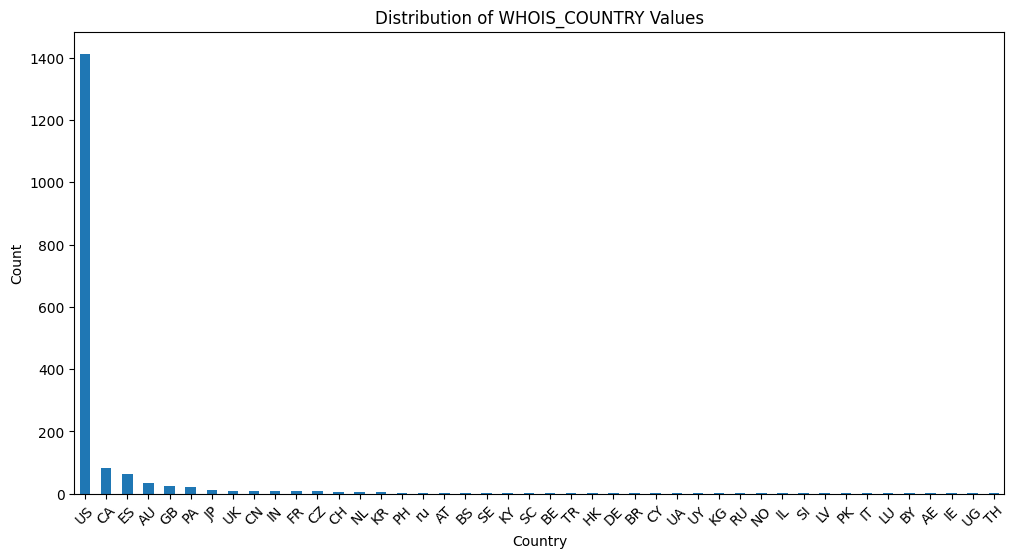

In [143]:


# Create a bar chart of value counts in WHOIS_COUNTRY column
plt.figure(figsize=(12, 6))
websites['WHOIS_COUNTRY'].value_counts().plot(kind='bar')
plt.title("Distribution of WHOIS_COUNTRY Values")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [144]:

# Create a mapping of top 10 countries and "OTHER"
top_countries = websites['WHOIS_COUNTRY'].value_counts().head(10).index
country_mapping = {country: country if country in top_countries else 'OTHER' for country in websites['WHOIS_COUNTRY']}

# Apply the mapping to the WHOIS_COUNTRY column
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].map(country_mapping)

# Print the updated value counts
display(websites['WHOIS_COUNTRY'].value_counts())


WHOIS_COUNTRY
US       1412
OTHER     100
CA         84
ES         63
AU         35
GB         25
PA         21
JP         11
UK         10
IN         10
CN         10
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [145]:

# Drop specified columns
columns_to_drop = ['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
websites.drop(columns=columns_to_drop, inplace=True)

# Print the DataFrame to verify changes
display(websites.head())


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,US,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,US,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,Apache,US,57,2,5,4278,61,62,129889,4586,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [146]:

# Print the data types of the columns
print(websites.dtypes)


URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [147]:

# Drop the URL column
websites.drop(columns=['URL'], inplace=True)

# Print the DataFrame to verify changes
display(websites.head())


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,US,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,US,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,US,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,US,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,Apache,US,57,2,5,4278,61,62,129889,4586,61,4.0,0


#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [148]:
# Print unique value counts of CHARSET column
print(websites['CHARSET'].value_counts())

CHARSET
UTF-8           683
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
windows-1251      1
ISO-8859          1
windows-1252      1
Name: count, dtype: int64


`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [149]:
# Print unique values of SERVER column
unique_servers = websites['SERVER'].unique()
display(unique_servers)

array(['nginx', 'Apache/2.4.10', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'Apache/2', 'nginx/1.10.1', 'Apache/2.2.15 (Red Hat)',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'openresty/1.11.2.1', 'Apache/2.2.22', 'Apache/2.4.7 (Ubuntu)',
       'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Oracle-iPlanet-Web-Server/7.0', 'cloudflare-nginx', 'nginx/1.6.2',
       'openresty', 'Heptu web server', 'Pepyaka/1.11.3', 'nginx/1.8.0',
       'nginx/1.10.1 + Phusion Passenger 5.0.30',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5', 'LiteSpeed',
       'Apache/2.4.25 (cPanel) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'tsa_c', 'Apache/2.2.0 (Fedora)', 'Apache/2.2.22 (Debian)',
       'Apache/2.2.15 (CentOS)', 'Apache/2.4.25',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
      

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [150]:

# Create a mapping of unique server values to categories
server_mapping = {
    'Microsoft': 'Microsoft',
    'Apache': 'Apache',
    'nginx': 'nginx'
}

# Map the values in the SERVER column to the specified categories
websites['SERVER'] = websites['SERVER'].map(server_mapping)

# Replace any other values with 'Other'
websites['SERVER'].fillna('Other', inplace=True)

# Print unique values of SERVER column after consolidation
unique_servers_after = websites['SERVER'].unique()
print(unique_servers_after)


['nginx' 'Other' 'Apache']


In [151]:

# Count value counts of SERVER categories
server_value_counts = websites['SERVER'].value_counts()
print(server_value_counts)


SERVER
Other     1008
Apache     562
nginx      211
Name: count, dtype: int64


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [152]:

# Create dummy variables and drop categorical columns
website_dummy = pd.get_dummies(websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'], drop_first=True)

# Print the head of the website_dummy DataFrame
display(website_dummy.head())


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,7,7,0,2,700,9,10,1153,832,...,False,False,False,False,False,False,False,False,False,True
1,16,6,17,7,4,1230,17,19,1265,1230,...,False,False,False,False,False,False,False,False,False,True
2,16,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,17,6,31,22,3,3812,39,37,18784,4380,...,False,False,False,False,False,False,False,False,False,True
4,17,6,57,2,5,4278,61,62,129889,4586,...,False,False,False,False,False,False,False,False,False,True


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [153]:
# Print the info of the website_dummy DataFrame
display(website_dummy.info())

# Print the head of the website_dummy DataFrame
display(website_dummy.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1781 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 4   REMOTE_IPS                 1781 non-null   int64  
 5   APP_BYTES                  1781 non-null   int64  
 6   SOURCE_APP_PACKETS         1781 non-null   int64  
 7   REMOTE_APP_PACKETS         1781 non-null   int64  
 8   SOURCE_APP_BYTES           1781 non-null   int64  
 9   REMOTE_APP_BYTES           1781 non-null   int64  
 10  APP_PACKETS                1781 non-null   int64  
 11  DNS_QUERY_TIMES            1781 non-null   float64
 12  Type                       1781 non-null   int64  
 13  CHARSET_ISO-8859-1         1781 non-null   bool 

None

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,7,7,0,2,700,9,10,1153,832,...,False,False,False,False,False,False,False,False,False,True
1,16,6,17,7,4,1230,17,19,1265,1230,...,False,False,False,False,False,False,False,False,False,True
2,16,6,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,17,6,31,22,3,3812,39,37,18784,4380,...,False,False,False,False,False,False,False,False,False,True
4,17,6,57,2,5,4278,61,62,129889,4586,...,False,False,False,False,False,False,False,False,False,True


# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [154]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (1424, 31)
X_test shape: (357, 31)
y_train shape: (1424,)
y_test shape: (357,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [155]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
logreg_model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LogisticRegression model with increased max_iter and different solver
logreg_model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Fit the LogisticRegression model to the training data
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [157]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict using the fitted model on the testing data
logreg_y_pred = logreg_model.predict(X_test)

# Calculate the confusion matrix
logreg_cm = confusion_matrix(y_test, logreg_y_pred)
print("Logistic Regression Confusion Matrix:")
print(logreg_cm)

# Calculate the accuracy score
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print("\nLogistic Regression Accuracy Score:", logreg_accuracy)


Logistic Regression Confusion Matrix:
[[304   2]
 [ 24  27]]

Logistic Regression Accuracy Score: 0.927170868347339


What are your thoughts on the performance of the model? Write your conclusions below.

In [158]:
# True Positive (TP): 27 websites were correctly classified as malicious (True Positives).
# True Negative (TN): 304 websites were correctly classified as benign (True Negatives).
# False Positive (FP): 2 websites were classified as malicious but were actually benign (False Positives).
# False Negative (FN): 24 websites were classified as benign but were actually malicious (False Negatives).

# Logistic Regression Accuracy Score: 92.71% which indicates that it performs relatively well in terms of overall classification correctness.

# The logistic regression model seems to be performing well.


#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [159]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and fit the KNN model with k=3:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [160]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = website_dummy.drop(columns=['Type'])
y = website_dummy['Type']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.to_numpy(), y_train)

# Predict with KNN model
knn_y_pred = knn_model.predict(X_test.to_numpy())

# Calculate confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_cm)

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\nK-Nearest Neighbors Accuracy Score:", knn_accuracy)


K-Nearest Neighbors Confusion Matrix:
[[299   7]
 [ 17  34]]

K-Nearest Neighbors Accuracy Score: 0.9327731092436975


#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [162]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train.to_numpy(), y_train)

# Predict with KNN model
knn_y_pred = knn_model.predict(X_test.to_numpy())

# Calculate confusion matrix
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("K-Nearest Neighbors Confusion Matrix:")
print(knn_cm)

# Calculate accuracy score
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("\nK-Nearest Neighbors Accuracy Score:", knn_accuracy)


K-Nearest Neighbors Confusion Matrix:
[[301   5]
 [ 18  33]]

K-Nearest Neighbors Accuracy Score: 0.9355742296918768


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [163]:
# There s no really improovment between the K3 and the K5 as shwowing by the accuracy score.



#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

In [164]:
#lib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [165]:
# Initialize Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)


In [166]:
# Initialize Random Forest model -----> is the best model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)


In [167]:
# Initialize Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)

In [168]:
# Initialize Extra Trees model
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
et_y_pred = et_model.predict(X_test)
et_accuracy = accuracy_score(y_test, et_y_pred)

In [169]:
# Print accuracy scores
print("Decision Tree Accuracy Score:", dt_accuracy)
print("Random Forest Accuracy Score:", rf_accuracy)
print("SVM Accuracy Score:", svm_accuracy)
print("Extra Trees Accuracy Score:", et_accuracy)

Decision Tree Accuracy Score: 0.9467787114845938
Random Forest Accuracy Score: 0.9495798319327731
SVM Accuracy Score: 0.8571428571428571
Extra Trees Accuracy Score: 0.9355742296918768


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [170]:
# Your code here